# A Handwritten Digits Classifier

Import modules

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Transforming the data to pandas dataframe

In [2]:
digits = load_digits()
digit_labels = pd.Series(digits['target'])
digit_data = pd.DataFrame(digits['data'])

Data Preview

In [3]:
digit_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [4]:
digit_data.shape

(1797, 64)

Reshaping the image for preview

In [5]:
img_1 = digit_data.iloc[0]
img_1.values

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
rshape = img_1.values.reshape(8,8)
rshape

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

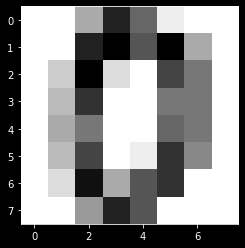

In [7]:
plt.imshow(rshape, cmap='gray_r')
plt.show()

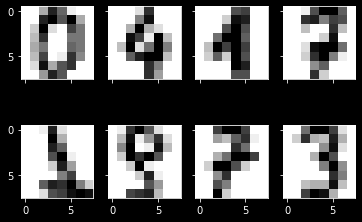

In [8]:
f, ax = plt.subplots(2, 4, sharey=True, sharex=True)
def imshw(x,y, img_row,):
    ax[x, y].imshow(digit_data.iloc[img_row].values.reshape(8,8), cmap='gray_r')
    
imshw(0, 0, 0)
imshw(0, 1, 100)
imshw(0, 2, 200)
imshw(0, 3, 300)

imshw(1, 0, 1000)
imshw(1, 1, 1100)
imshw(1, 2, 1200)
imshw(1, 3, 1300)

K-Nearest Neighbors Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Split up the data into train and test sets
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

# Function to test the model
def test(model, test_features, test_labels):
    pred = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['pred_label'] = pred
    overall_accuracy = sum(train_test_df["pred_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

# Function to perform cross validation
def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(digit_data):
        train_features, test_features = digit_data.loc[train_index], digit_data.loc[test_index]
        train_labels, test_labels = digit_labels.loc[train_index], digit_labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        accuracies.append(overall_accuracy)
    return accuracies


Experimenting for different value of k

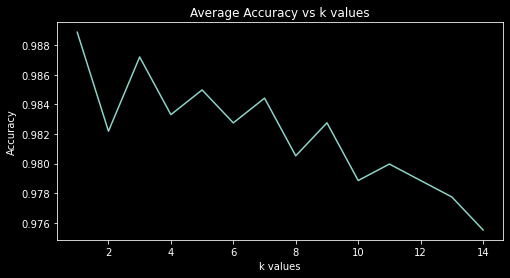

In [10]:
K_vals = list(range(1,15))
knn_accuracy = []

for k in K_vals:
    k_accuracy = cross_validate(k)
    k_avg_accuracy = np.mean(k_accuracy)
    knn_accuracy.append(k_avg_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Average Accuracy vs k values")
plt.plot(K_vals, knn_accuracy)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.show()

Neural Network with One Hidden Layer

In [11]:
from sklearn.neural_network import MLPClassifier

# Split up the data into train and test sets
def train_nn(neuron_lay, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes= neuron_lay)
    mlp.fit(train_features, train_labels)
    return mlp

# Function to perform cross validation
def cross_validate(neuron_lay):
    accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(digit_data):
        train_features, test_features = digit_data.loc[train_index], digit_data.loc[test_index]
        train_labels, test_labels = digit_labels.loc[train_index], digit_labels.loc[test_index]
        
        model = train_nn(neuron_lay, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        accuracies.append(overall_accuracy)
    return accuracies

c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multi

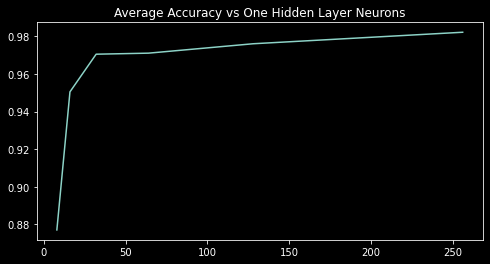

In [12]:
one_lay_neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]
one_lay_accuracy = []

for n in one_lay_neurons:
    nn_accuracy = cross_validate(n)
    nn_avg_accuracy = np.mean(nn_accuracy)
    one_lay_accuracy.append(nn_avg_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Average Accuracy vs One Hidden Layer Neurons')

x = [s[0] for s in one_lay_neurons]
plt.plot(x, one_lay_accuracy)
plt.show()

Summary

With a single hidden layer, the accuracy improved the accuracy to 97%.

Neural Network with Two Hidden Layers

[0.9693986636971047, 0.9760826528087108, 0.9810863647611977]


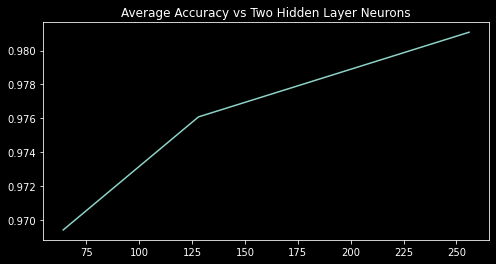

In [13]:
two_lay_neurons = [(64,64), (128,128), (256,256)]
two_lay_accuracy = []

for n in two_lay_neurons:
    nn_accuracy = cross_validate(n)
    nn_avg_accuracy = np.mean(nn_accuracy)
    two_lay_accuracy.append(nn_avg_accuracy)
    
print(two_lay_accuracy)

plt.figure(figsize=(8,4))
plt.title('Average Accuracy vs Two Hidden Layer Neurons')

x = [s[0] for s in two_lay_neurons]
plt.plot(x,two_lay_accuracy)
plt.show()

Summary

With two hidden layers the accuracy improved to 98%.

Neural Network with Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[0.9365681902638424, 0.9699628390932739, 0.9805314009661835]


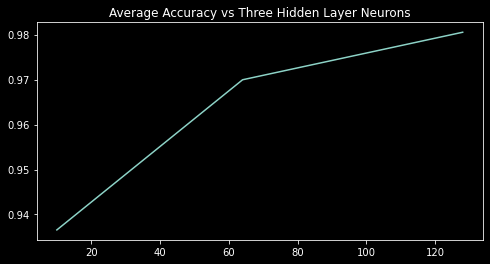

In [14]:
def cross_validate(neuron_lay):
    accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(digit_data):
        train_features, test_features = digit_data.loc[train_index], digit_data.loc[test_index]
        train_labels, test_labels = digit_labels.loc[train_index], digit_labels.loc[test_index]
        
        model = train_nn(neuron_lay, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        accuracies.append(overall_accuracy)
    return accuracies

three_lay_neurons = [(10,10,10), (64,64,64), (128,128,128)]
three_lay_accuracy = []

for n in three_lay_neurons:
    nn_accuracy = cross_validate(n)
    nn_avg_accuracy = np.mean(nn_accuracy)
    three_lay_accuracy.append(nn_avg_accuracy)
    
print(three_lay_accuracy)

plt.figure(figsize=(8,4))
plt.title('Average Accuracy vs Three Hidden Layer Neurons')

x = [s[0] for s in three_lay_neurons]
plt.plot(x,three_lay_accuracy)
plt.show()

Summary

With three hidden layers and six-fold cross validation, the accuracy is 98%.